In [107]:
import openmm as mm
import openmm.app as app
#
from ipywidgets import Image
#
from openff.interchange.components._packmol import (
    RHOMBIC_DODECAHEDRON,
    solvate_topology,
)
from openff.toolkit import ForceField, Molecule, Topology
from openff.units import Quantity
from openff.pablo import CCD_RESIDUE_DEFINITION_CACHE
from ptm_prototype import draw_molecule
#
import rdkit
from rdkit import Chem
from rdkit import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.rdChemReactions import ReactionFromSmarts
print(rdkit.__version__)
#
import IPython
#
Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)
draw_options = Chem.Draw.MolDrawOptions()
draw_options.addAtomIndices = True

2025.03.6


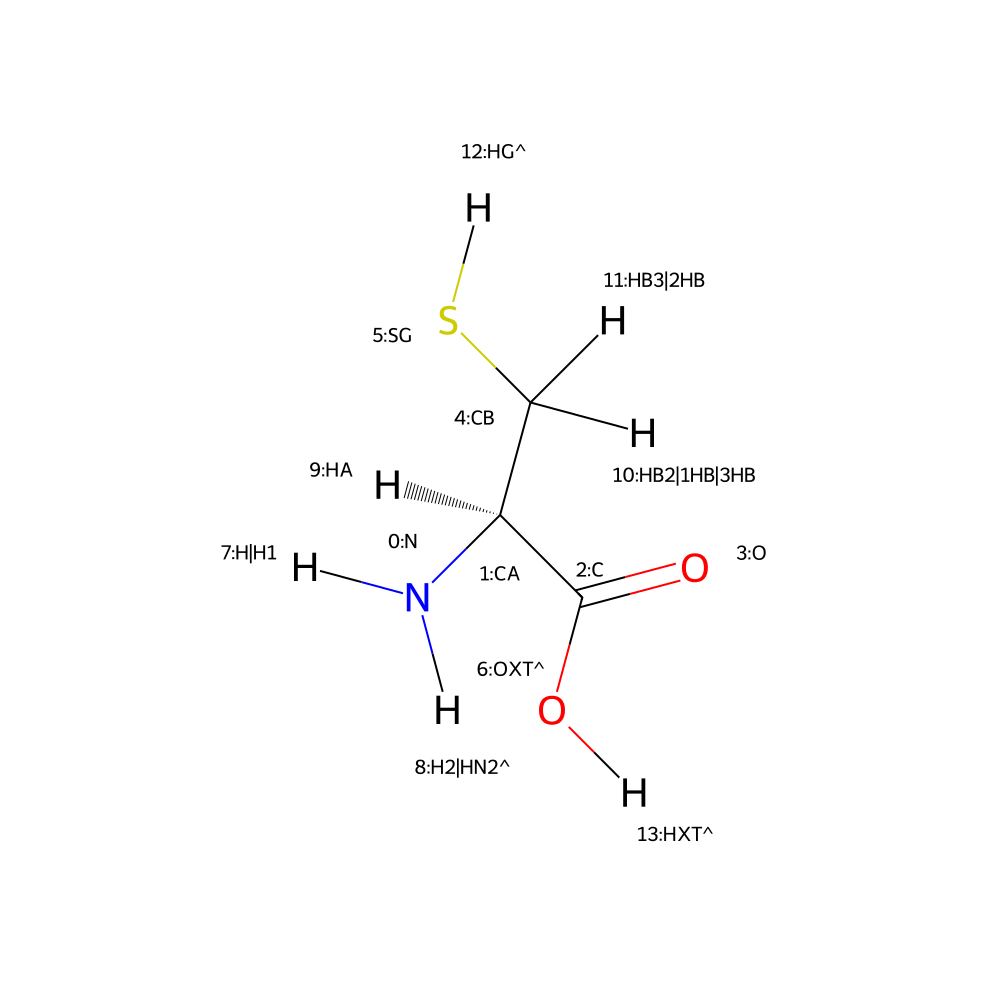

In [108]:
cysteine = CCD_RESIDUE_DEFINITION_CACHE["CYS"][0].to_openff_molecule()
draw_molecule(
    cysteine,
    width=1000,
    height=1000,
    atom_notes={
        i: (
            f"{i}:{'|'.join([atom.name, *atom.metadata.get('synonyms', '').split()])}"
            + f"{'^' if bool(atom.metadata.get('leaving_atom')) else ''}"
        )
        for i, atom in enumerate(cysteine.atoms)
    },
)

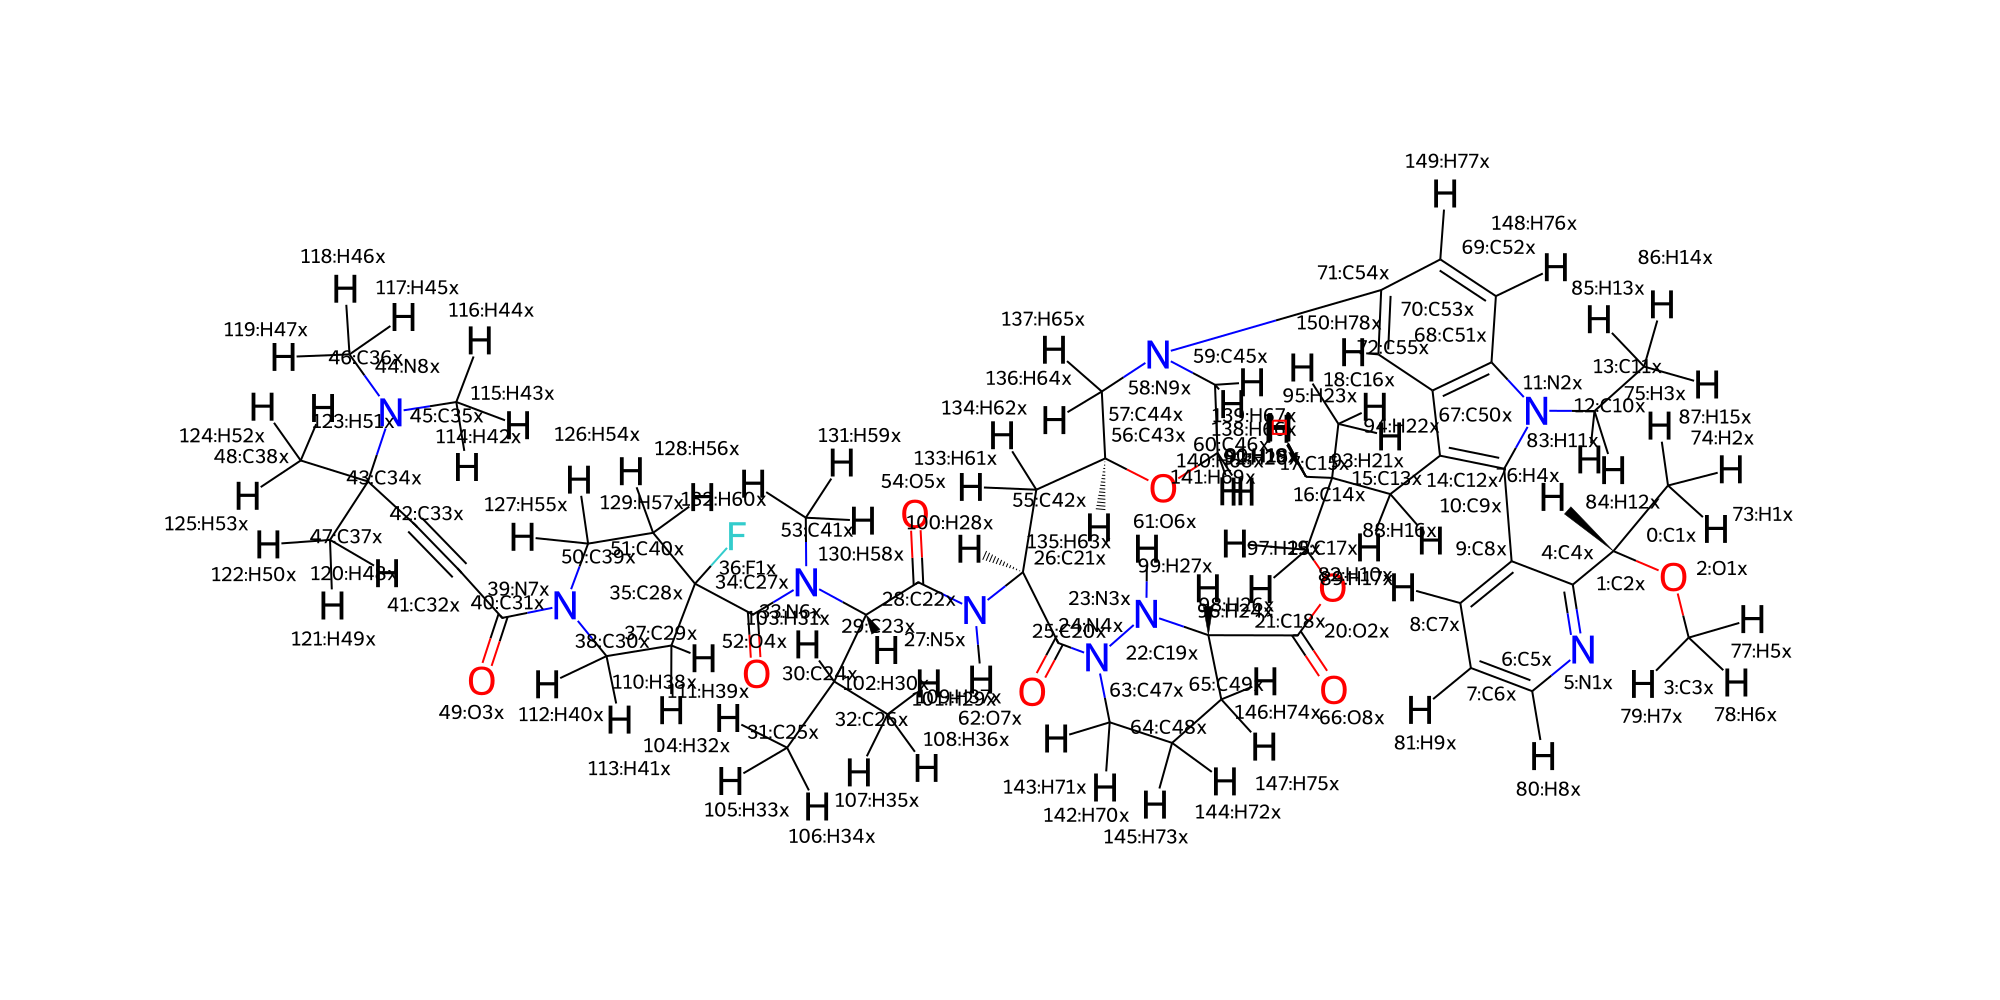

In [109]:
Elironrasib = Molecule.from_smiles("C[C@H](OC)C(N=CC=C1)=[C@@]1[C@](N2CC)=C(CC(C)(C)COC([C@H]3NN(C([C@@H](NC([C@H](C(C)C)N(C(C4(F)CCN(C(C#CC(N(C)C)(C)C)=O)CC4)=O)C)=O)C[C@H]5CN6CCO5)=O)CCC3)=O)C7=C2C=CC6=C7")
Elironrasib.generate_unique_atom_names()

draw_molecule(
    Elironrasib,
    width=2000,
    height=1000,
    atom_notes={
        i: (
            f"{i}:{'|'.join([atom.name, *atom.metadata.get('synonyms', '').split()])}"
            + f"{'^' if bool(atom.metadata.get('leaving_atom')) else ''}"
        )
        for i, atom in enumerate(Elironrasib.atoms)
    },
)

In [110]:
from rdkit import Chem
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions
m = Chem.MolFromSmarts('[C:10]-[S:1]-[C:3](-[C:11])=[C:4][C:5](=[O:6])-[N:7](-[C:8])-[C:9]')
isomers = tuple(EnumerateStereoisomers(m))
len(isomers)

for smarts in sorted(Chem.MolToSmarts(x, isomericSmiles=True) for x in isomers):
    print(smarts)

[C:10]-[S:1]/[C:3](-[C:11])=[C:4]/[C:5](=[O:6])-[N:7](-[C:8])-[C:9]
[C:10]-[S:1]/[C:3](-[C:11])=[C:4]\[C:5](=[O:6])-[N:7](-[C:8])-[C:9]


In [111]:
covalent_triple_bond_smarts_cis = '[C:10]-[S:1]-[H:2].[C:11]-[C:3]#[C:4]-[C:5](=[O:6])-[N:7](-[C:8])-[C:9]>>[C:10]-[S:1]/[C:3](-[C:11])=[C:4](/[H])[C:5](=[O:6])-[N:7](-[C:8])-[C:9]'
#covalent_triple_bond_smarts_cis = '[C:10]-[S:1]-[H:2].[C:11]-[C:3]#[C:4]-[C:5](=[O:6])-[N:7](-[C:8])-[C:9]>>[C:10]-[S:1]/[C:3](-[C:11])=[C:4]\[C:5](=[O:6])-[N:7](-[C:8])-[C:9]'
rxn = ReactionFromSmarts(covalent_triple_bond_smarts_cis)
d2d = Draw.MolDraw2DCairo(800, 300)
d2d.DrawReaction(rxn, highlightByReactant=True)
Image(value=d2d.GetDrawingText())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01,\x08\x02\x00\x00\x00\xb4O@m\x00\x00…

[17:29:30] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 2 


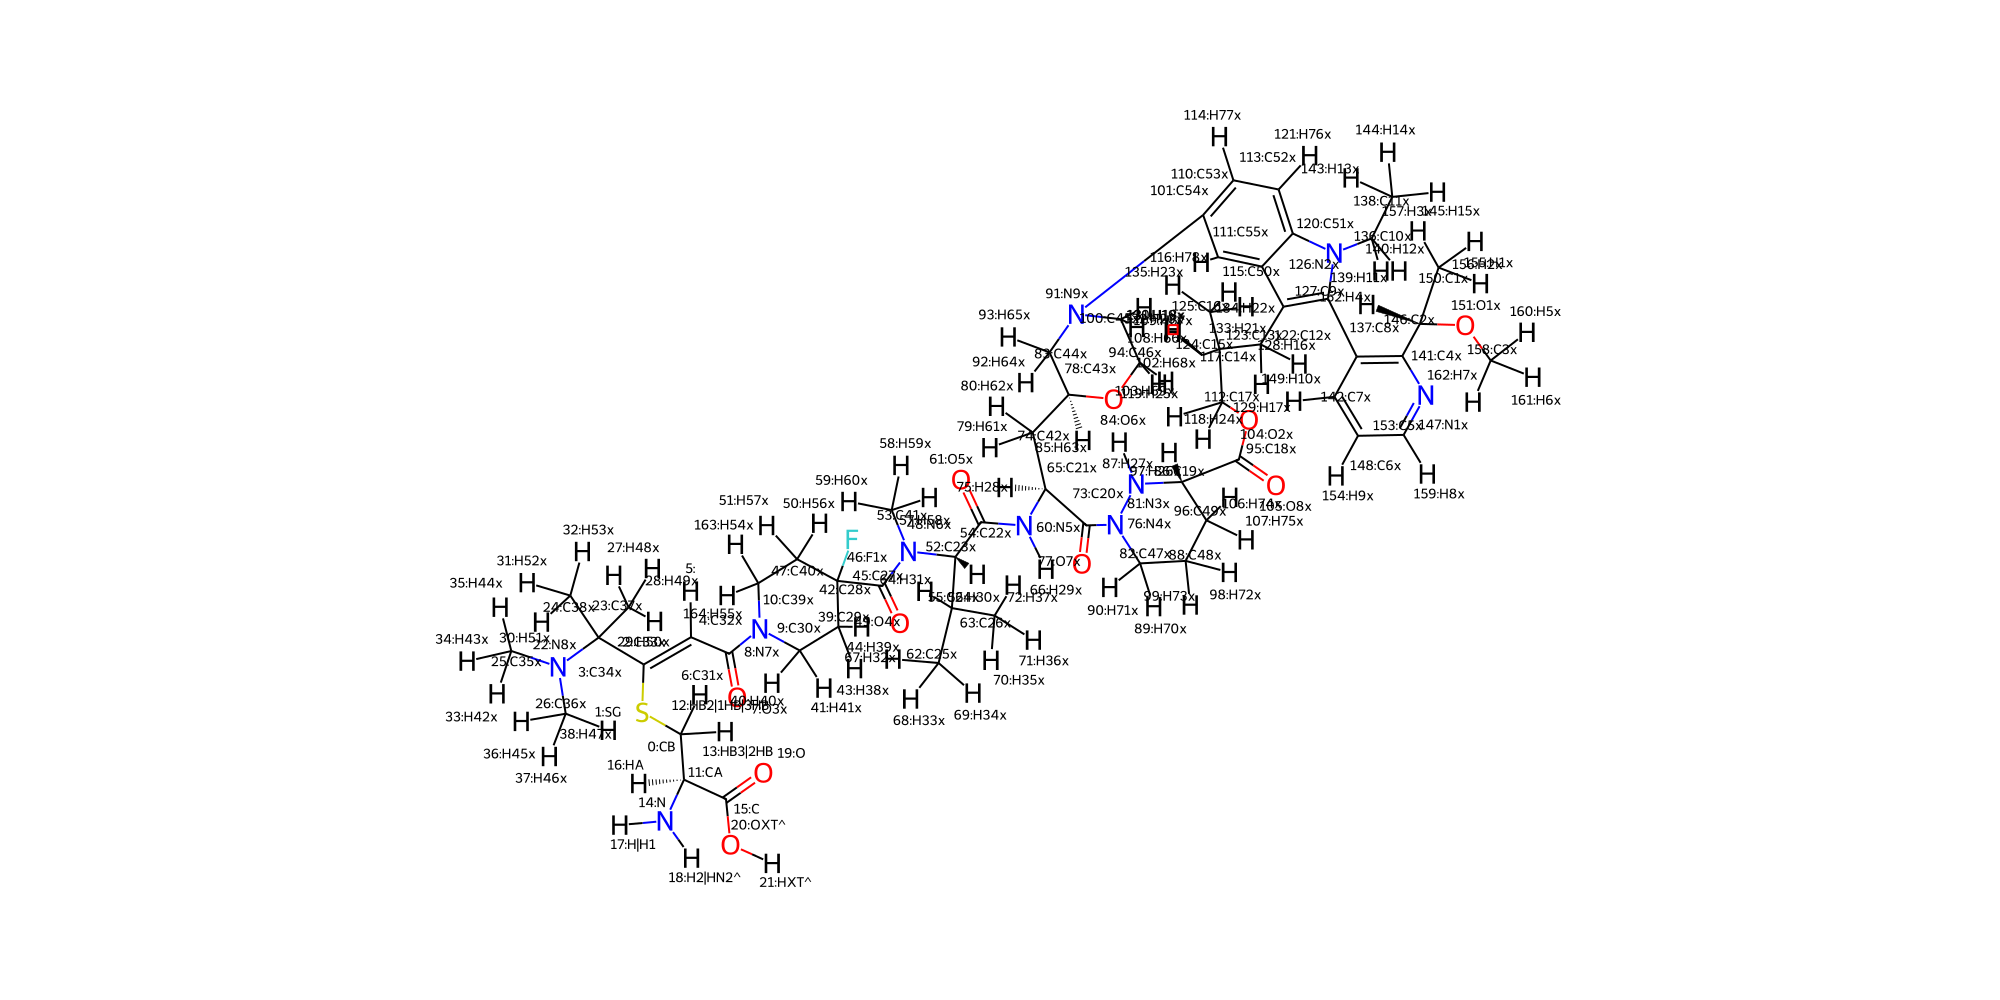

In [112]:
from ptm_prototype import react_mod

products = list(react_mod([cysteine, Elironrasib], covalent_triple_bond_smarts_cis))
adduct = products[0][0]

draw_molecule(
    adduct,
    width=2000,
    height=1000,
    atom_notes={
        i: (
            f"{i}:{'|'.join([atom.name, *atom.metadata.get('synonyms', '').split()])}"
            + f"{'^' if bool(atom.metadata.get('leaving_atom')) else ''}"
        )
        for i, atom in enumerate(adduct.atoms)
    },
)

In [113]:
for atom in adduct.atoms:
    if atom.symbol == 'H':
        print(f"Atom index: {atom.molecule_atom_index}; Atom name: {atom.name}")

Atom index: 5; Atom name: 
Atom index: 12; Atom name: HB2
Atom index: 13; Atom name: HB3
Atom index: 16; Atom name: HA
Atom index: 17; Atom name: H
Atom index: 18; Atom name: H2
Atom index: 21; Atom name: HXT
Atom index: 27; Atom name: H48x
Atom index: 28; Atom name: H49x
Atom index: 29; Atom name: H50x
Atom index: 30; Atom name: H51x
Atom index: 31; Atom name: H52x
Atom index: 32; Atom name: H53x
Atom index: 33; Atom name: H42x
Atom index: 34; Atom name: H43x
Atom index: 35; Atom name: H44x
Atom index: 36; Atom name: H45x
Atom index: 37; Atom name: H46x
Atom index: 38; Atom name: H47x
Atom index: 40; Atom name: H40x
Atom index: 41; Atom name: H41x
Atom index: 43; Atom name: H38x
Atom index: 44; Atom name: H39x
Atom index: 50; Atom name: H56x
Atom index: 51; Atom name: H57x
Atom index: 56; Atom name: H30x
Atom index: 57; Atom name: H58x
Atom index: 58; Atom name: H59x
Atom index: 59; Atom name: H60x
Atom index: 64; Atom name: H31x
Atom index: 66; Atom name: H29x
Atom index: 67; Atom na

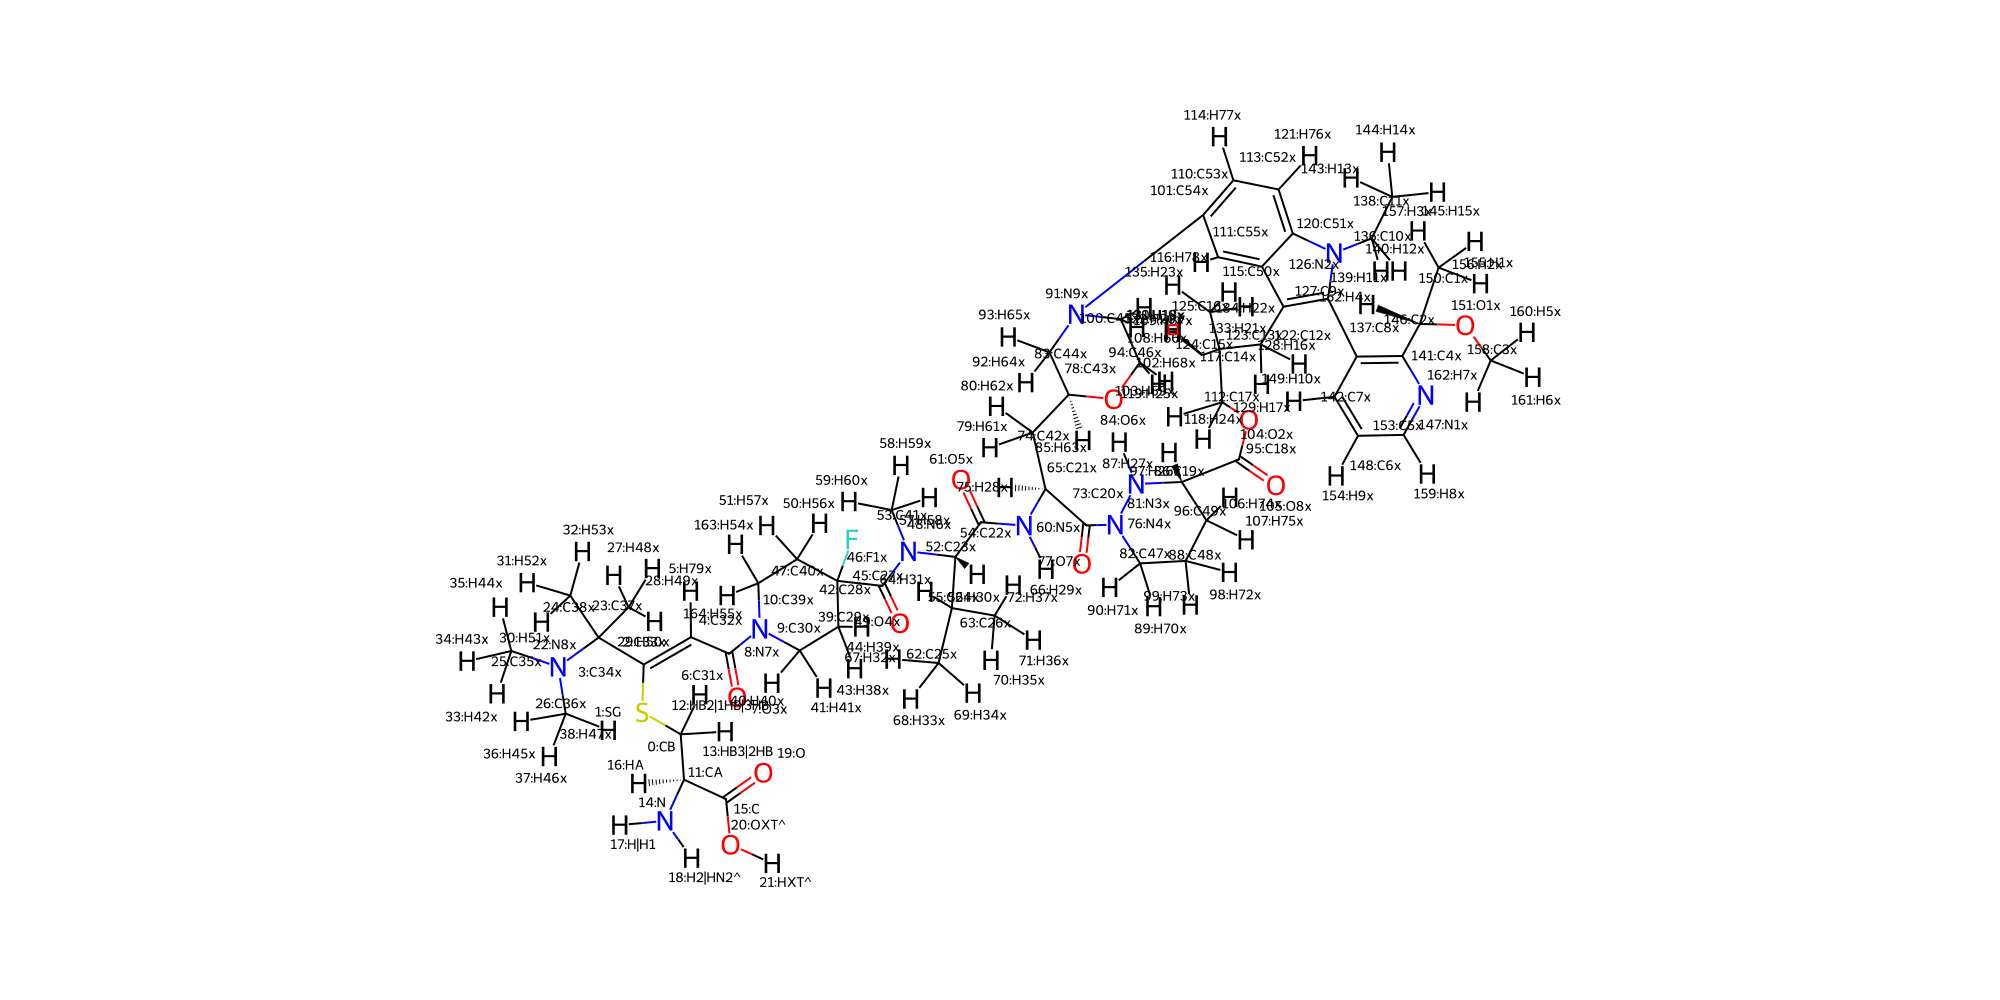

In [114]:
adduct.atom(5).name = 'H79x'

draw_molecule(
    adduct,
    width=2000,
    height=1000,
    atom_notes={
        i: (
            f"{i}:{'|'.join([atom.name, *atom.metadata.get('synonyms', '').split()])}"
            + f"{'^' if bool(atom.metadata.get('leaving_atom')) else ''}"
        )
        for i, atom in enumerate(adduct.atoms)
    },
)

In [115]:
from openff.pablo import ResidueDefinition
from openff.pablo.chem import PEPTIDE_BOND

ligand_resdef = ResidueDefinition.from_molecule(
    molecule=adduct,
    residue_name="LIG",
    linking_bond=PEPTIDE_BOND,
)

In [116]:
type(ligand_resdef)

openff.pablo.residue.ResidueDefinition

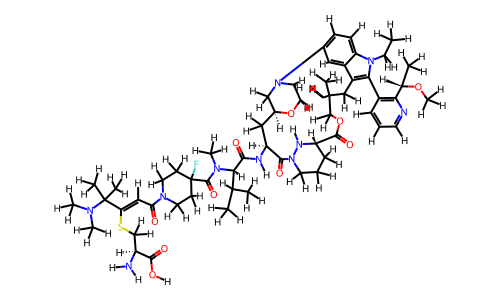

In [117]:
substructure_mol = ligand_resdef.to_openff_molecule()
substructure_mol

In [52]:
suppl = Chem.SDMolSupplier('resdef_H.sdf')[0]
suppl_H = Chem.AddHs(suppl, addCoords=True)

In [53]:
adduct_mol_H = adduct.to_rdkit()
for atom in adduct_mol_H.GetAtoms():
    print(atom.GetPropsAsDict())

{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331940a6c0>, '_CIPRank': 89, '_Name': 'CB'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331940a6c0>, '_CIPRank': 112, '_Name': 'SG'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331940a6c0>, '_CIPRank': 90, '_Name': 'C33x'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331940a6c0>, '_CIPRank': 74, '_Name': 'C34x'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331940a6c0>, '_CIPRank': 55, '_Name': 'C32x'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331940a6c0>, '_CIPRank': 16, '_Name': 'H79x'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE

In [26]:
adduct_mol = Chem.RemoveHs(adduct.to_rdkit())
for atom in adduct_mol.GetAtoms():
    print(atom.GetPropsAsDict())

{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331aa23640>, '_Name': 'CB'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331aa23640>, '_Name': 'SG'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331aa23640>, '_Name': 'C33x'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331aa23640>, '_Name': 'C34x'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331aa23640>, '_Name': 'C32x'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331aa23640>, '_Name': 'C31x'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x77331aa23640>, '_Name': 'O3x'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112b

In [54]:
with Chem.SDWriter('openff_top.sdf') as writer:
    writer.write(adduct_mol_H)

In [55]:
Elironrasib_top_H_canonical_smiles = Chem.MolToSmiles(adduct_mol_H, canonical=True)
Elironrasib_ref_H_canonical_smiles = Chem.MolToSmiles(suppl_H, canonical=True)
if Elironrasib_top_H_canonical_smiles == Elironrasib_ref_H_canonical_smiles:
    print(True)
else:
    print(False)

False


In [56]:
Elironrasib_top_canonical_smiles = Chem.MolToSmiles(adduct_mol, canonical=True)
Elironrasib_ref_canonical_smiles = Chem.MolToSmiles(suppl, canonical=True)
if Elironrasib_top_canonical_smiles == Elironrasib_ref_canonical_smiles:
    print(True)
else:
    print(False)

True


True


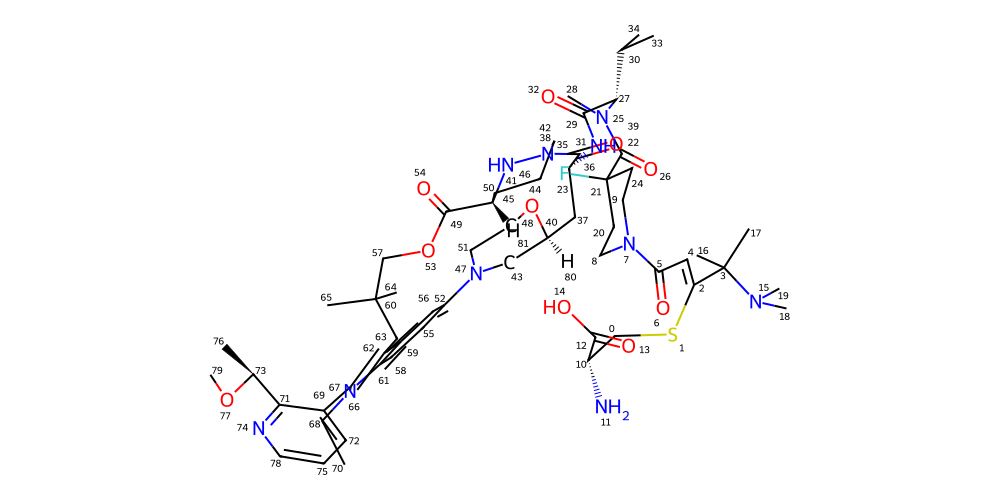

In [57]:
list_1 = list(map(int, adduct_mol.GetProp("_smilesAtomOutputOrder")[1:-1].split(",")))
list_2 = list(map(int, suppl.GetProp("_smilesAtomOutputOrder")[1:-1].split(",")))
if Elironrasib_top_canonical_smiles == Elironrasib_ref_canonical_smiles:
    print(True)
    res = list(zip(list_2,list_1))
    res.sort(key=lambda x: x[1])
    unzipped_list_2, unzipped_list_1 = zip(*res)
    new_indices = list(unzipped_list_2)
#
suppl_r = Chem.RenumberAtoms(suppl, new_indices)
IPython.display.display(Chem.Draw.MolToImage(suppl_r, size=(1000, 500), options=draw_options))

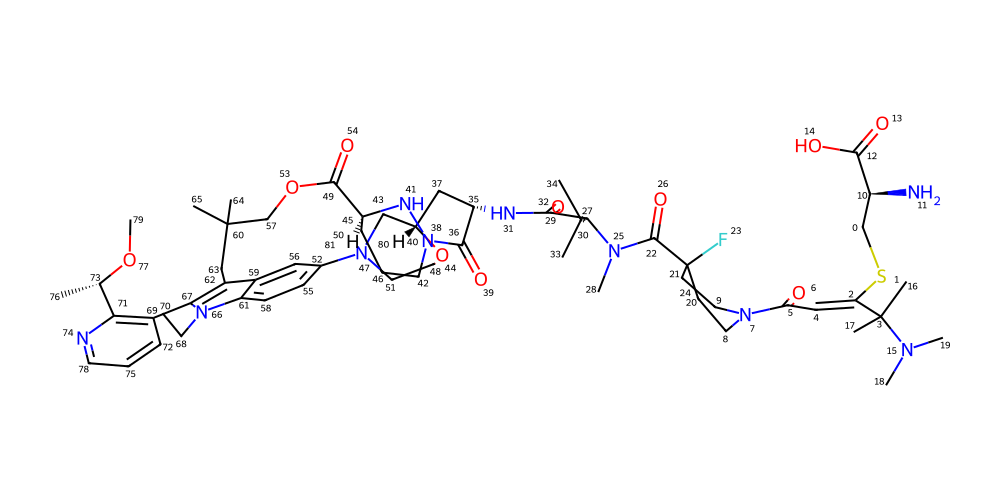

In [58]:
IPython.display.display(Chem.Draw.MolToImage(adduct_mol, size=(1000, 500), options=draw_options))

In [62]:
from rdkit.Chem.rdchem import AtomPDBResidueInfo

for i, atom in enumerate(adduct_mol.GetAtoms()):
    info = AtomPDBResidueInfo(
        atom.GetProp('_Name'),
        atom.GetIdx() + 1,
        ' ',
        'LIG',
        12,
        'B',
        ' ',
    )    
    suppl_r.GetAtomWithIdx(i).SetMonomerInfo(info)
Chem.MolToPDBFile(suppl_r, 'resdef.pdb')

In [63]:
for atom in suppl_r.GetAtoms():
    print(atom.GetPropsAsDict())

{'_NonExplicit3DChirality': 1, '__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x7733194097c0>, '_CIPRank': 50, '_AtomPDBResidueInfo.atomName': 'CB', '_AtomPDBResidueInfo.residueName': 'LIG', '_AtomPDBResidueInfo.residueNumber': 12, '_AtomPDBResidueInfo.chainId': 'B'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x7733194097c0>, '_CIPRank': 73, '_AtomPDBResidueInfo.atomName': 'SG', '_AtomPDBResidueInfo.residueName': 'LIG', '_AtomPDBResidueInfo.residueNumber': 12, '_AtomPDBResidueInfo.chainId': 'B'}
{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE object at 0x7733194097c0>, '_CIPRank': 51, '_AtomPDBResidueInfo.atomName': 'C33x', '_AtomPDBResidueInfo.residueName': 'LIG', '_AtomPDBResidueInfo.residueNumber': 12, '_AtomPDBResidueInfo.chainId': 'B'}
{'_NonExplicit3DChirality': 1, '__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stri

In [67]:
!pip install biopython

  Using cached biopython-1.85-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached biopython-1.85-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.3 MB)


In [68]:
from Bio.PDB import PDBParser, PDBIO

parser = PDBParser()
structure = parser.get_structure("9BFX_prep", "9BFX_renamed.pdb")
io = PDBIO()
io.set_structure(structure)
io.save("9BFX_prep.pdb")

/home/haolan/anaconda3/envs/openff_ptm_prototype/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5308.
  warnings.warn(


In [82]:
!openmm-setup in conda env openfe_env

In [106]:
legacy_topology = Topology.from_pdb(
    "9BFX_prep-processed.pdb",
    _additional_substructures=[substructure_mol],
)

UnassignedChemistryInPDBError: Some bonds or atoms in the input could not be identified.

Hint: The following residue names with unassigned atoms were not found in the substructure library. While the OpenFF Toolkit identifies residues by matching chemical substructures rather than by residue name, it currently only supports the 20 'canonical' amino acids.
    GNP
    LIG
    MG


Hint: The following residues were assigned names that do not match the residue name in the input, or could not be assigned residue names at all. This may indicate that atoms are missing from the input or some other error. The OpenFF Toolkit requires all atoms, including hydrogens, to be explicit in the input to avoid ambiguities in protonation state or bond order:
    Input residue B:ILE#0142 contains atoms matching substructures {'NO MATCH', 'ILE'}
    Input residue B:ASP#0154 contains atoms matching substructures {'ASP', 'NO MATCH'}
    Input residue B:LIG#0012 contains atoms matching substructures {'NO MATCH', 'F'}
    Input residue D:GNP#0201 contains atoms matching substructures {'NO MATCH'}
    Input residue E:MG#0202 contains atoms matching substructures {'NO MATCH'}

Error: The following 125 atoms exist in the input but could not be assigned chemical information from the substructure library:
    Atom  2242 (C01) in residue B:ILE#0142
    Atom  2243 (C02) in residue B:ILE#0142
    Atom  2244 (C03) in residue B:ILE#0142
    Atom  2245 (C04) in residue B:ILE#0142
    Atom  2246 (C05) in residue B:ILE#0142
    Atom  2421 (N01) in residue B:ASP#0154
    Atom  2422 (C02) in residue B:ASP#0154
    Atom  2423 (C03) in residue B:ASP#0154
    Atom  2424 (O04) in residue B:ASP#0154
    Atom  2425 (C05) in residue B:ASP#0154
    Atom  2426 (C06) in residue B:ASP#0154
    Atom  2427 (O07) in residue B:ASP#0154
    Atom  2428 (O08) in residue B:ASP#0154
    Atom  2710 (N) in residue B:LIG#0012
    Atom  2711 (CA) in residue B:LIG#0012
    Atom  2712 (C) in residue B:LIG#0012
    Atom  2713 (O) in residue B:LIG#0012
    Atom  2714 (CB) in residue B:LIG#0012
    Atom  2715 (SG) in residue B:LIG#0012
    Atom  2716 (OXT) in residue B:LIG#0012
    Atom  2717 (C1x) in residue B:LIG#0012
    Atom  2718 (N1x) in residue B:LIG#0012
    Atom  2719 (O1x) in residue B:LIG#0012
    Atom  2720 (C2x) in residue B:LIG#0012
    Atom  2721 (N2x) in residue B:LIG#0012
    Atom  2722 (O2x) in residue B:LIG#0012
    Atom  2723 (C3x) in residue B:LIG#0012
    Atom  2724 (N3x) in residue B:LIG#0012
    Atom  2725 (O3x) in residue B:LIG#0012
    Atom  2726 (C4x) in residue B:LIG#0012
    Atom  2727 (N4x) in residue B:LIG#0012
    Atom  2728 (O4x) in residue B:LIG#0012
    Atom  2729 (C5x) in residue B:LIG#0012
    Atom  2730 (N5x) in residue B:LIG#0012
    Atom  2731 (O5x) in residue B:LIG#0012
    Atom  2732 (C6x) in residue B:LIG#0012
    Atom  2733 (N6x) in residue B:LIG#0012
    Atom  2734 (O6x) in residue B:LIG#0012
    Atom  2735 (C7x) in residue B:LIG#0012
    Atom  2736 (N7x) in residue B:LIG#0012
    Atom  2737 (O7x) in residue B:LIG#0012
    Atom  2738 (C8x) in residue B:LIG#0012
    Atom  2739 (N8x) in residue B:LIG#0012
    Atom  2740 (O8x) in residue B:LIG#0012
    Atom  2741 (C9x) in residue B:LIG#0012
    Atom  2742 (N9x) in residue B:LIG#0012
    Atom  2743 (C10x) in residue B:LIG#0012
    Atom  2744 (C11x) in residue B:LIG#0012
    Atom  2745 (C12x) in residue B:LIG#0012
    Atom  2746 (C13x) in residue B:LIG#0012
    Atom  2747 (C14x) in residue B:LIG#0012
    Atom  2748 (C15x) in residue B:LIG#0012
    Atom  2749 (C16x) in residue B:LIG#0012
    Atom  2750 (C17x) in residue B:LIG#0012
    Atom  2751 (C18x) in residue B:LIG#0012
    Atom  2752 (C19x) in residue B:LIG#0012
    Atom  2753 (C20x) in residue B:LIG#0012
    Atom  2754 (C21x) in residue B:LIG#0012
    Atom  2755 (C22x) in residue B:LIG#0012
    Atom  2756 (C23x) in residue B:LIG#0012
    Atom  2757 (C24x) in residue B:LIG#0012
    Atom  2758 (C25x) in residue B:LIG#0012
    Atom  2759 (C26x) in residue B:LIG#0012
    Atom  2760 (C27x) in residue B:LIG#0012
    Atom  2761 (C28x) in residue B:LIG#0012
    Atom  2762 (C29x) in residue B:LIG#0012
    Atom  2763 (C30x) in residue B:LIG#0012
    Atom  2764 (C31x) in residue B:LIG#0012
    Atom  2765 (C32x) in residue B:LIG#0012
    Atom  2766 (C33x) in residue B:LIG#0012
    Atom  2767 (C34x) in residue B:LIG#0012
    Atom  2768 (C35x) in residue B:LIG#0012
    Atom  2769 (C36x) in residue B:LIG#0012
    Atom  2770 (C37x) in residue B:LIG#0012
    Atom  2771 (C38x) in residue B:LIG#0012
    Atom  2772 (C39x) in residue B:LIG#0012
    Atom  2773 (C40x) in residue B:LIG#0012
    Atom  2774 (C41x) in residue B:LIG#0012
    Atom  2775 (C42x) in residue B:LIG#0012
    Atom  2776 (C43x) in residue B:LIG#0012
    Atom  2777 (C44x) in residue B:LIG#0012
    Atom  2778 (C45x) in residue B:LIG#0012
    Atom  2779 (C46x) in residue B:LIG#0012
    Atom  2780 (C47x) in residue B:LIG#0012
    Atom  2781 (C48x) in residue B:LIG#0012
    Atom  2782 (C49x) in residue B:LIG#0012
    Atom  2783 (C50x) in residue B:LIG#0012
    Atom  2784 (C51x) in residue B:LIG#0012
    Atom  2785 (C52x) in residue B:LIG#0012
    Atom  2786 (C53x) in residue B:LIG#0012
    Atom  2787 (C54x) in residue B:LIG#0012
    Atom  2788 (C55x) in residue B:LIG#0012
    Atom  5289 (PA) in residue D:GNP#0201
    Atom  5290 (PB) in residue D:GNP#0201
    Atom  5291 (PG) in residue D:GNP#0201
    Atom  5292 (C5') in residue D:GNP#0201
    Atom  5293 (O5') in residue D:GNP#0201
    Atom  5294 (C4') in residue D:GNP#0201
    Atom  5295 (O4') in residue D:GNP#0201
    Atom  5296 (C3') in residue D:GNP#0201
    Atom  5297 (O3') in residue D:GNP#0201
    Atom  5298 (C2') in residue D:GNP#0201
    Atom  5299 (O2') in residue D:GNP#0201
    Atom  5300 (C1') in residue D:GNP#0201
    Atom  5301 (N1) in residue D:GNP#0201
    Atom  5302 (O1A) in residue D:GNP#0201
    Atom  5303 (O1B) in residue D:GNP#0201
    Atom  5304 (O1G) in residue D:GNP#0201
    Atom  5305 (C2) in residue D:GNP#0201
    Atom  5306 (N2) in residue D:GNP#0201
    Atom  5307 (O2A) in residue D:GNP#0201
    Atom  5308 (O2B) in residue D:GNP#0201
    Atom  5309 (O2G) in residue D:GNP#0201
    Atom  5310 (N3) in residue D:GNP#0201
    Atom  5311 (N3B) in residue D:GNP#0201
    Atom  5312 (O3A) in residue D:GNP#0201
    Atom  5313 (O3G) in residue D:GNP#0201
    Atom  5314 (C4) in residue D:GNP#0201
    Atom  5315 (C5) in residue D:GNP#0201
    Atom  5316 (C6) in residue D:GNP#0201
    Atom  5317 (O6) in residue D:GNP#0201
    Atom  5318 (N7) in residue D:GNP#0201
    Atom  5319 (C8) in residue D:GNP#0201
    Atom  5320 (N9) in residue D:GNP#0201
    Atom  5321 (MG) in residue E:MG#0202


## Solvate with the OpenFF PackMOL wrapper

Now that we have an OpenFF `Topology` of the post-translationally modified protein, we can solvate it in familiar ways. For example, with the `solvate_topology` function from the experimental Interchange PackMOL wrapper:

In [13]:
topology = solvate_topology(
    topology,
    nacl_conc=Quantity(0.1, "mol/L"),
    #padding=Quantity(1.2, "nm"),
    padding=None,
    box_shape=RHOMBIC_DODECAHEDRON,
)

In [14]:
w = topology.visualize()
w.clear_representations()
w.add_cartoon()
w.add_line(opacity=0.5, crossSize=1.0)
w.add_licorice("DYE", radius=0.3)
w.add_unitcell()
w.center("DYE")
w

NGLWidget()

Note that this box requires NPT equilibration before production simulation.

## Parametrize the solvated system using a combination of the Sage and FF14sb force fields and the NAGL graph charge package

The final new component of the prototype is the "swiss cheese" parametrization method. This refers to applying library charges to the parts of the protein for which they are defined in the ff14sb force field, and "filling in the holes" with NAGL graph charges. This is a streamlined stopgap to a more natural direct parametrization to a future force field that supports both proteins and NAGL charges natively. Note that this produces a bit of a Frankenstein's monster of a parametrization; while NAGL charges are philosophically compatible with both Sage and Amber force fields, and Sage and Amber force fields are philosophically compatible with each other, the actual quality of the resulting simulations has never been rigorously tested and might hold some surprises! If you perform such testing, please [let us know!]

This'll take a few minutes; graph charges are much faster than quantum chemical methods, but a protein is still a large molecule.

[let us know!]:https://github.com/openforcefield/ptm_prototype/issues/new

In [15]:
from ptm_prototype import parametrize_with_nagl

sage_ff14sb = ForceField("openff-2.2.1.offxml", "ff14sb_off_impropers_0.0.4.offxml")

interchange = parametrize_with_nagl(force_field=sage_ff14sb, topology=topology)

adding dummy charges to force field ...
making Interchange ...
replacing dummy charges with NAGL charges ... 
assigning graph charges to C1659H2566N432O512S7 ...


[14:21:08] WARNING: Proton(s) added/removed



continuing with dummy charge replacement ...


## Run a short simulation in OpenMM

Now that we have an Interchange, we can prepare simulations in any of the usual output engines. Here we'll use OpenMM. We'll also save a copy of the system to disk so we have an exact record of what we simulated. We're not aiming to tell you how to run a simulation here, just demonstrate what we can do; you'll need much more substantial equilibration to clean up the PackMOL box.

In [47]:
from ptm_prototype import get_openmm_total_charge

temperature = 300 * openmm.unit.kelvin
pressure = 1 * openmm.unit.bar

timestep = 2 * openmm.unit.femtosecond
friction_coeff = 1 / openmm.unit.picosecond
barostat_frequency = 25

print("making OpenMM simulation ...")
simulation = interchange.to_openmm_simulation(
    integrator=openmm.LangevinMiddleIntegrator(
        temperature,
        friction_coeff,
        timestep,
    ),
    additional_forces=[
        openmm.MonteCarloBarostat(
            pressure,
            temperature,
            barostat_frequency,
        ),
    ],
)
#
print(f"total system charge is {get_openmm_total_charge(simulation.system)}")

#print("serializing OpenMM system ...")
#with open("system.xml", "w") as f:
    #f.write(openmm.XmlSerializer.serialize(simulation.system))

making OpenMM simulation ...
total system charge is -1.9591390199025227e-07


In [48]:
from openmm.app import PDBFile
with open('initial_system.pdb', 'w') as f:
    PDBFile.writeFile(simulation.topology, simulation.context.getState(getPositions=True).getPositions(), f)

In [49]:
context = simulation.context
print("Simulation is running on:", context.getPlatform().getName())

Simulation is running on: CUDA


Minimize the energy:

In [50]:
simulation.context.computeVirtualSites()
simulation.minimizeEnergy()
simulation.context.setVelocitiesToTemperature(simulation.integrator.getTemperature())

In [51]:
dcd_reporter = app.DCDReporter('trajectory.dcd', 100)
simulation.reporters.append(dcd_reporter)
#
state_reporter = app.StateDataReporter('energy_data.csv',
                                       100,
                                       step=True,
                                       time=True, 
                                       potentialEnergy=True,
                                       kineticEnergy=True,
                                       totalEnergy=True,
                                       temperature=True,
                                       volume=True,
                                       density=True,
                                       speed=True,
                                      )
simulation.reporters.append(state_reporter)

Run the simulation for a minute of wall time:

In [52]:
simulation.runForClockTime(1.0 * openmm.unit.minute)

Finally, visualize the resulting trajectory in NGLView!

In [53]:
from ptm_prototype import nglview_show_openmm

w = nglview_show_openmm(simulation.topology, "trajectory.dcd")
w.add_licorice("DYE", radius=0.3)
w.center("DYE")
w

NGLWidget(max_frame=492)

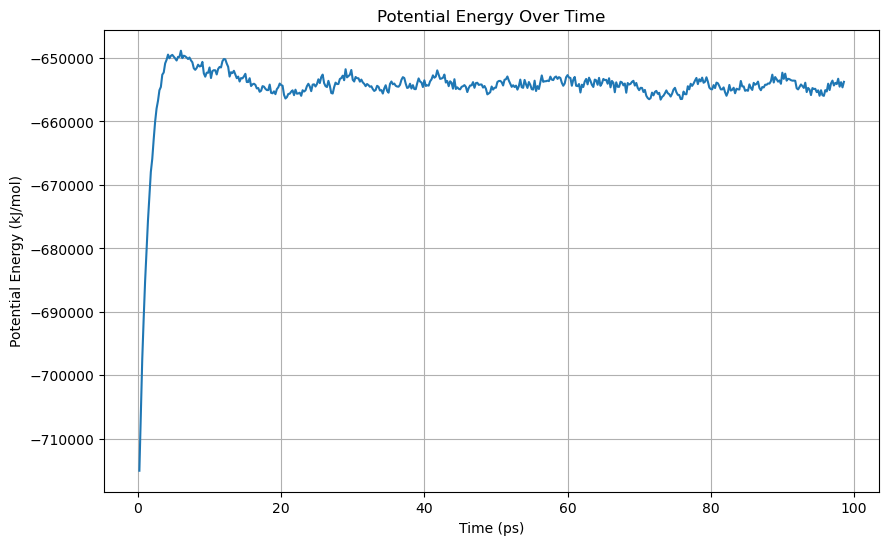

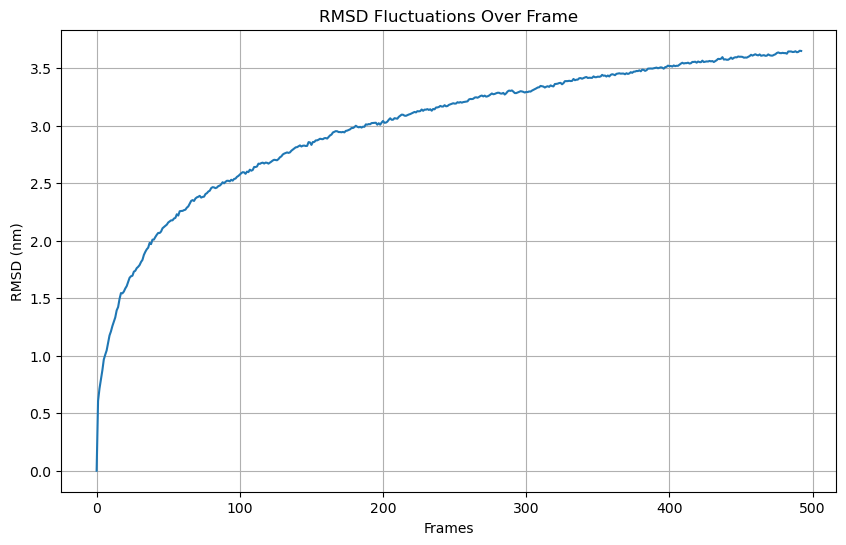

In [54]:
import mdtraj as md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
topology_file = 'initial_system.pdb'
trajectory_file = 'trajectory.dcd'
traj = md.load(trajectory_file, top=topology_file)
#
state_file = 'energy_data.csv'
#
def plot_potential_energy(state_file):

    df = pd.read_csv(state_file)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Time (ps)', y='Potential Energy (kJ/mole)')
    plt.xlabel('Time (ps)')
    plt.ylabel('Potential Energy (kJ/mol)')
    plt.title('Potential Energy Over Time')
    plt.grid(True)
    plt.show()


def plot_rmsd_fluctuations(trajectory):

    traj.superpose(traj, frame=0)
    rmsd = md.rmsd(traj, traj, 0)
    frames = np.arange(0, traj.n_frames)

    plt.figure(figsize=(10, 6))
    plt.plot(frames, rmsd, label='RMSD')
    plt.xlabel('Frames')
    plt.ylabel('RMSD (nm)')
    plt.title('RMSD Fluctuations Over Frame')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    plot_potential_energy(state_file)
    plot_rmsd_fluctuations(traj)